<img src="feedback_cover_foto.png" alt="Summing Circuit Example" width="600px">

Chapter 6, 11, 12, and some of 13 is covered by this lab. If you are stuck, we highly encourage you to ask questions. This lab will have a higher focus on understanding, and discussion than the last lab, and you should spend the majority of time writing and understanding the circuits rather than just doing the step-by-step for the tasks. 



# (1) Feedback of a $2^{\text{nd}}$ order system

<img src="1_feedbacksystem.png" alt="Feedback system overview" width="500px">

A general feedback system can be illustrated by the figure above. if we wish to calculate the relation between input and output voltage, and we know that a general feedback system can be written as (see also this YT video). 

$$ H(s) = \frac{V_{out}}{V_{in}} = \frac{A \cdot C}{1 - AB} = \frac{AC}{1-F} $$

Our Wienbridge circuit from LAB-B is a feedback system. 

<img src="1_wienbridge_labc.png" alt="Wienbridge feedback circuit" width="500px">

We can describe the circuit (picture above) in relation to the general feedback blocks as (the G value is given by the amplifier gain):

$$ A(s) = G \cdot \frac{sRC}{(sRC)^2 + 3sRC + 1} \; , \; B(s) = 1 \; , \; C(s) = 1 $$

The term G is the gain given by the OpAmp "OA2" in the amplifier block, and is depended on $R_{5}$ and $R_{6}$ like any other OpAmp with negative feedback. if we change $R_{6}$ to e.i $ 20 k \Omega$ we get G = 2. We can write the equation for G so that G becomes:

$$     G = - \frac{R_{feedback}}{R_{input}} = - \frac{ 20 k \Omega}{ 10 k \Omega} \rightarrow 2 $$

Here I have chosen to write G = 2 and not G = -2 since the negatives cancel out from the summation circuit. When the RC term is held constant, then G is the only term that affects the pole placement. In the region where G gives complex ploes, we can use the characteristic equation for resonance:

$$ H(s) = G \cdot \frac{sRC}{(sRC)^2 + (3-G)sRC + 1} = G \cdot \frac{\tau s}{\frac{s^2}{\omega^2_0} + \frac{s}{Q\omega_0} + 1} $$

Where the quality factor, $Q = 1/2\zeta$, the dampning factor, $\zeta = cos(\Theta) = \alpha/|z|$, where $\alpha$ is the real part and $|z|$ is the amplitude of the poles.


### (a) Drive $H(s)$ for a feedback system:


<img src="1_wienbridge_labc.png" alt="1_wienbridge_labc.png" width="600px">


- [ ] Let $H(s)$ be the transfer function for our filter with feedback look. Set the values for the $A \wedge B \wedge C$ blocks in the feedback system comprised of blocks and reduce the system down to:

$$
    H(s) = G \cdot \frac{sRC}{(sRC)^2 + sRC(3-G) + 1}
$$



### (b) Study the pole placement for the Wienbridge filter with an increasing value of G:


|   G   | omega |  Q  | Re(pol1) | Im(pol1) | Re(pol2) | Im(pol2) | stability | oscillation |
|-------|------------|-----|----------|----------|----------|----------|-----------|-------------|
|   0   |            |     |          |          |          |          |           |             |
| 0.25  |            |     |          |          |          |          |           |             |
| ↓     |     ↓      |  ↓  |    ↓     |    ↓     |    ↓     |    ↓     |     ↓     |      ↓      |


- [ ] Change $R_{6}$ (feedback in Amplifier) so that G increases from 0 up to 7 using step size of 0.25
- [ ] Calculate $Q$ and $\omega_0$, and fill inn the table above for all G values.
    - [ ] You only need include $Q$ and $\omega_0$
    where these are relevant.
    - [ ] the "stability" colon is meant to be answered with: Stable/MarginallyStable/Unstable
    - [ ] the "oscillation" colon is meant to be answered with: No/Dampened/Constant/Increasing
- [ ] Make a pole plot on the "S-plane". Do it in such a way that pole-1 and pole-2 are shown in separate plots. You can do this any way you like (even by hand), but make it with this in mind: The plots should have a title and clear labelling on the axis.

NOTE: Here you can use the attached script prettytable.py

G    | omega | Q      | Re(pol1)   | Im(pol1) | Re(pol2)  | Im(pol2)  | stability         | oscillation
-------------------------------------------------------------------------------------------------------
0    | 10000 | 0.333  | -26180.34  | 0        | -3819.66  | 0         | Stable            | No         
0.25 | 10000 | 0.364  | -23187.293 | 0        | -4312.707 | 0         | Stable            | No         
0.5  | 10000 | 0.4    | -20000     | 0        | -5000     | 0         | Stable            | No         
0.75 | 10000 | 0.444  | -16403.882 | 0        | -6096.118 | 0         | Stable            | No         
1    | 10000 | 0.5    | -10000     | 0        | -10000    | 0         | Stable            | No         
1.25 | 10000 | 0.571  | -8750      | 4841.229 | -8750     | -4841.229 | Stable            | Dampened   
1.5  | 10000 | 0.667  | -7500      | 6614.378 | -7500     | -6614.378 | Stable            | Dampened   
1.75 | 10000 | 0.8    | -6250      | 7806.247 | -6250     | -780

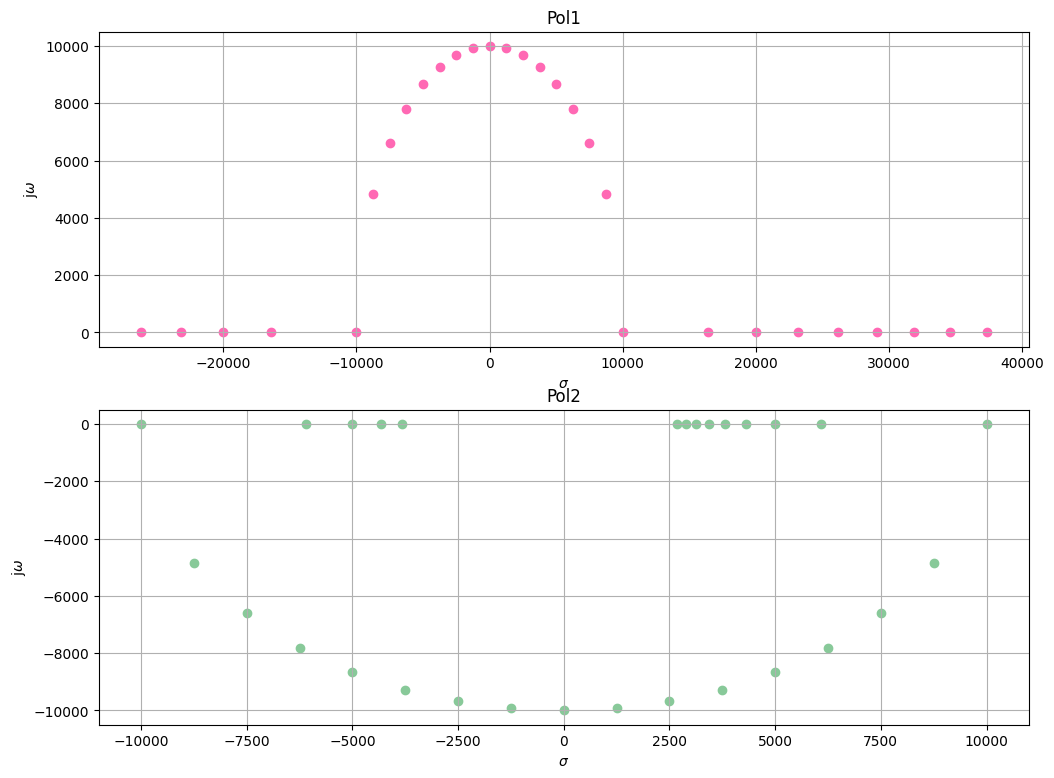

In [14]:
%run prettytable.py
import numpy as np
import matplotlib.pyplot as plt

R = 1e4
C = 10e-9
fig, ax = plt.subplots(2,1, figsize = (12, 9))
ax[0].set_title("Pol1")
ax[1].set_title("Pol2")
ax[0].grid(1)
ax[1].grid(1)

ax[0].set_xlabel(r"$\sigma$")
ax[1].set_xlabel(r"$\sigma$")
ax[0].set_ylabel(r"j$\omega$")
ax[1].set_ylabel(r"j$\omega$")

def custom_round(num):
    rounded_num = round(num, 3)
    return int(rounded_num) if rounded_num == int(rounded_num) else rounded_num

for G in np.arange(0, 7.25, 0.25):
    # Handle the case where Q would be infinite
    if G == 3:
        Q = "inf"
    else:
        Q = custom_round(1 / (3 - G))
    
    a = (R*C)**2
    b = (3 - G) * R*C
    c = 1

    poles = np.roots([a, b, c])
    real = np.real(poles)
    imag = np.imag(poles)
    ax[0].scatter(real[0], imag[0], color = "hotpink")
    ax[1].scatter(real[1], imag[1], color = "#88c999")
   

### (c) Stability and oscillation

In the calculations for the pole placements for the Wienbridge filter (from the wienbridge circuit) in the last subsection, we calculated as is the OpAmps where ideal and we neglected the effects of the diode. When we are to simulate a circuit, then that circuit has to reflect the one that we have calculated on because then we can more easily confirm our calculations. Therefore we will replace the OpAmps with ideal OpAmps in the simulator. Unlike when using non-ideal OpAmp, ideal OpAmps require us to kickstart the oscillation somehow. 


<img src="1_wienbridge_labc_simple.png" alt="1_wienbridge_labc_simple.png" width="600px">

The figure above shows an ideal Wienbridge filter. $R_6$ is regulated such that we get the G values as described in the exercise. The CSV voltage source provides a short pulse of $1 mV$ for less than $1 ms$ (but you can choose a given length yourself) based on the time step.

- [ ] Draw/modify the schematic and preform a transient analysis for G = [0.5, 2.9, 3, 3.1]
    - [ ] Does the simulator show whether the circuit is unstable or not for the different values for G?
    - [ ] Are there any correlation between the results from the simulation, the calculated pole placements in the last exercise, and the theory regarding pole placement and stability?
- [ ] For H(s) in the main feedback equation (in sub-section a), let $G = 2.5$, calculate $\tau, \; Q, \; \omega_0$.
- [ ] Use the calculated values to draw an asymptotic Bodeplot for both ampltude and phase.
- [ ] Draw the effects of Q at the resonance frequency.

### (d) Non-feedback system

In the previous exercise we looked at how the gain term, G affected the circuit in the Wienbridge circuit when the circuit was fed-back. We're now going to study the system, but without the feedback loop. Cutting the feedback wire, reduces our system down to:
$$
    A(s) = G \cdot \frac{sRC}{(sRC)^2 + 3sRC + 1} \; , \; B(s) = 0 \; , \; C(s) = 1
$$

- [ ] Comment on the effect of removing the feedback loop. What is the new transfer function for the new system $H(s)$?
- [ ] Use Circuitlab/Python to comment on the following: How will G affect (if it matters):
    - [ ] The gain
    - [ ] The bandwidth
    - [ ] The resonance frequency
    - [ ] The Q factor
    - [ ] Can the system be unstable without a feedback loop?

# (2) Contour analysis & Nyquist plots

Let $H(s)$ be given as a feedback system (like the block feedback system). Note that we know: **"An unstable system has poles in the right half plane in the S-plane"**. Since we can sometimes struggle to calculate all the poles in a fed-back system,we can find out if the main $H(s)$ is stable by looking at the feedback loop system transfer function $AC = F(s)$. Plotting this $F(s)$ in a Bodeplot or Nyquist plot will tell us is the main function $H(s)$ is stable.

Consider the case $F(s) = (0 j, -1)$ in the S-plane. If the denominator for the main $H(s)$ equal zero then $H(s) = infinity$ and we have a pole in our main system. . We can simulate and plot the imaginary parts of $F(s)$ along the y-axis and the real parts among the x-axis for increasing frequencies. This will result in a curve that we call a Nyquist plot. 

To make a Nyquist plot using Circuitlab, run a AC sweep (with decade) [10->10MEG Hz] (Bodeplot). 
You can plot a Nyquist plot from Bode plot data by converting the magnitude and phase information into complex numbers, which represent the transfer function $ H(j\omega) $ at various frequencies.

The conversion from magnitude $ |H| $ in dB and phase $ \angle H $ in degrees to a complex number $ H $ is done as follows:

$$
H = |H| \cdot e^{j \angle H}
$$

$$
H = 10^{\frac{{\text{Magnitude in dB}}}{20}} \cdot e^{j \text{Phase in degrees} \cdot \frac{\pi}{180}}
$$

Once this is done we can plot it using matplotlib as `plt.plot(H.real, H.imag, label='Nyquist plot')`. Please see 
`nyquist_from_csv_example.py` for an example code, dooing this for our wienbridge filter with feedback and G = 4.2.


NOTE-1: (see YT video about Nyquist plot : https://youtu.be/sof3meN96MA)
NOTE-2: there are other ways to plot nyquist also, see `nyquist_plot_using_ctrl.py` and `nyquist_plot_using_function.py` for examples

### (a) Nyquist plot for an active low-pass filter


<img src="labc_feedbacklowpass.png" alt="labc_feedbacklowpass.png" width="600px">

The transfer function for the filter without the feedback is given as:
$$
F(s) = (-1)\frac{1}{RCs + 1} \cdot G = \frac{-G}{\tau_1 s + 1}
$$

Where the (-1) term comes from the first OpAmp, while the RC term ($\tau$) comes from the filter itself between the two OpAmps, and lastly the G term comes from the last OpAmp. Set up like the bottom circuit and using the block system equation from the start of this lab we get:
$$
H(s) = \frac{\frac{-G}{1 + G}}{\frac{RC}{1 + G} s + 1}
$$
**Let G = 4 for all task under.**
- [ ] Show that $F(s)$ will turn into the form of $H(s)$ using block system equation from the start of this lab. 
- [ ] By now in the course, you should be able to plot functions on the form $G/(\tau s + 1)$ by hand. Discuss $F(s) \; \& \; H(s)$, and what the feedback loop does to the gain/cut-off freq/attenuation-per-decade.
- [ ] Shortly explain what an increase in G will do with the cut-off frequency and with the gain for $H(s)$.
- [ ] Preform an AC-analysis and plot a bodeplot for the two circuits to verify your assumptions. **NOTE: although we cannot tell if you did this beforehand, I would highly suggest to make you assumptions before plotting.**
- [ ] Calculate the placement of the poles in the S-plane for $H(s)$. what does the poles tell us about the stability of the filter? 
- [ ] Using G = 4, calculate and fill out the table under. 
- [ ] Simulate and add $F(s)$'s Nyquist plot to your journal using the steps in the start of the section to preform this. Comment on how your plot fits with the table below. 

| Omega         | Im(F(s)) | Re(F(s)) |
|---------------|----------|----------|
| 0             |          |          |
| ( 1 / tau )   |          |          |
| infinity      |          |          |


### (b) Stability for a system with several poles

<img src="1_wienbridge_labc_simple.png" alt="1_wienbridge_labc_simple.png" width="1000px">

We will now study our Wienbridge filter (same as before) to see if we can use Nyquist plot to determine stability. If we remove the feedback loop of our filter, then the remaining circuit will be the $A\cdot C = F(s)$. 

- [ ] Preform the AC-sweep and plot the Nyquist plot using the steps in the start of the section to preform this.
- [ ] Study the plot and answer the following:
    - [ ] According to the Nyquist plot: is the main circuit (the one with feedback) stable? How does the Nyquist plot correlate the calculated pole placement? 
    - [ ] Add your Nyquist plot to your journal and comment on the 'critical point' and the 'critical region'. 
    - [ ] In the exercise for 'Stability and oscillation' (sec1-subsectionc), you did a transient analysis (time domain analysis) of the total system using G = 2.9. Do you see any correlation between the time domain analysis and the Nyquist plot for the feedback loop gain in this circuit?
    
    

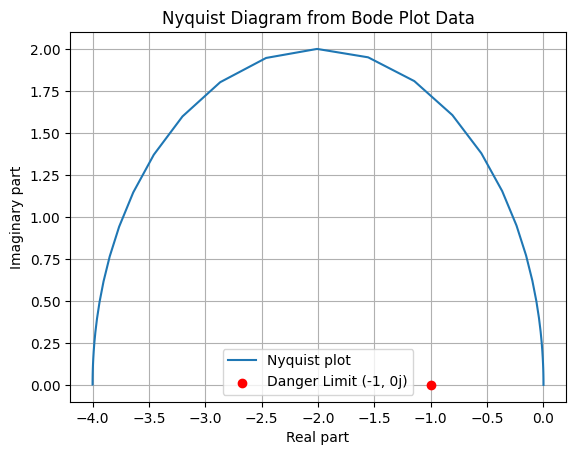

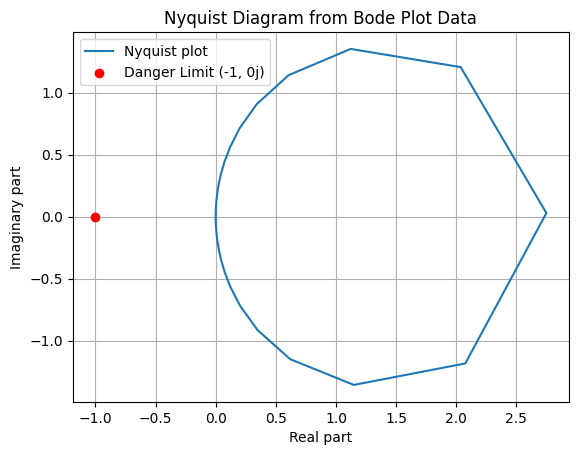

In [2]:
%run nyquist_from_csv_example.py "nyquist.csv"
%run nyquist_from_csv_example.py "2b_nyquist.csv"


# (3) PI regulators


<img src="pi_regulator.png" alt="pi_regulator.png" width="1000px">

Normally a gas pedal on a car affects the carburettor directly. The harder we step on the gas pedal the more fuel is being injected to the motor. If we are to test how fast our car can go from 0 to 100, we go for 'pedal to the metal', and write down the time when we pass 100. If we wish to hold this speed, we need to adjust the gas up and down so the car won't accelerate anymore. 
We are now going to improve this adjustment by using a more 'intelligent gas pedal'. A system that accelerates to the wanted speed, and then holds it there without further acceleration. (a sort of 'give me '100'km/h' cruise control). In our model we will make it so that $ 1 mV = 1 km/h$, and $ 1 ms =  1 s$. 


To mode our system as a circuit we will need several components. The **first** is a RC-lowpass component, to model the slow response of the system (the RC-circuit will respond to the pulse a bit delayed). **Second** we will need a subtraction circuit that will tell us the difference between our speed and the wanted speed induced by the "pedal" VPULSE. **Third** We will introduce a PI-regulator that will take the difference in wanted speed and our speed and produce a push based on the P & I parts. (see if you can find these three parts in the circuit)
The input can be a simple **CSV** voltage source that goes high to $100 mV$ after some time and then keeps the voltage at that level. 

In our circuit we can model just the RC-lowpass circuit as: 
$$
    H(s) = \frac{1}{RCs + 1}
$$

And we can model our system as a whole as:
$$
    O(s) = \frac{W}{s} \frac{PI(s)}{1/H(s) + PI(s)} = \frac{W}{s} \frac{P + I\frac{1}{s}}{\frac{1}{H(s)} + P + I\frac{1}{s}}
$$

Where $W$ is the wanted speed from the VPULSE, and $O(s)$ is the output of the system. Since this is a system that will only become equal to the input value given infinite time, we have to set a boundary that is beneficial to look at. A usual boundary is the $5 \cdot tau$ mark. At $5 \cdot tau$ the solution have reached $\approx 99 \% $ of its final value. $(1-e^{-5})\cdot 100 \approx 99 \%$.

- [ ] Set up a transient analysis showing V(input) and V(output), with a stop time and a step size that suits our setup (try 50ms, and 10us respectfully, then toggle)  
- [ ] Let $R_{I1} = 1 M \Omega$ in your circuit such that the integrator term is practically disconnected. change the feedback in the P-regulator so we have a product term of 10. Run this simulation.
- [ ] How long did it take for the car to achieve 99\% of its max speed?
- [ ] What insight do you summize from this into what afftect different times of a PI regulator?


### (a) Testing the limitations of the motor

For a real car we cannot have infinite actuation. A real car will have limits on how much fuel you can inject into the motor and so on. We will set an arbitrary limit of $1 V$ as the highest actuation we can feed into the RC-circuit. 

Let: $R_{P1} = 10 k \Omega$, $R_{P2} = 50 k \Omega$, $R_{I1} = 20 k \Omega$, $C_{I1} = 10 n F$, this gives us a PI-regulator with P=5, but to calculated the I term we must use the integrators transfer function:

$$
     H_{integrator}(s) = \frac{Z_f}{Z_i} = \frac{1/(sC_{I1})}{R_{I1}} = I \cdot s
$$
$$
     I = \frac{1}{RCs} = \frac{1}{20 \cdot 10^3 \cdot 10^{-8}} = 5000
$$

- [ ] Shortly explain how the actuation changes over time in relation to how you would expect a real gas pedal to work. 
- [ ] Adjust the values in the table below such that you get the fastest zero to hounded as possible without going over 1V actuation. Fill inn the table when done.

|                     | Final speed  |
|---------------------|--------------|
| Time to reach 99%   |       ?      |
| P                   |       ?      |
| I                   |       ?      |
|   $ R_{p1} $        |       ?      |
|   $ R_{p2} $        |       ?      |
|   $ R_{I1} $        |       ?      |
|   $ C_{I1} $        |       ?      |
